In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import cv2
import keras 
import tensorflow as tf 
import os 
import glob as gb
from keras.layers import Dense , Dropout , Flatten , Conv2D , MaxPool2D , BatchNormalization , GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

c:\Users\compu maarouf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\compu maarouf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\compu maarouf\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at

In [2]:
train_path = r"D:\data\train"
test_path = r"D:\data\test"

In [3]:
for folder in os.listdir(train_path):
    folder_path = train_path + '/' + folder 
    files = gb.glob( pathname= str(folder_path + '/*.jpg'))
    print(f'found {len(files)} in folder {folder}')

found 1440 in folder benign
found 1197 in folder malignant


In [4]:
for folder in os.listdir(test_path):
    folder_path = test_path + '/' + folder 
    files = gb.glob( pathname= str( folder_path + '/*.jpg'))
    print(f'found {len(files)} in folder {folder}')

found 360 in folder benign
found 300 in folder malignant


In [5]:
code = { 'benign' : 0 , 'malignant' : 1}

def getcode(n):
    for x , i in code.items() :
        if n == i :
            return x

In [6]:
size = []
for folder in os.listdir(train_path):
    folder_path = train_path + '/' + folder 
    files = gb.glob( pathname= str(folder_path + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    2637
Name: count, dtype: int64

In [7]:
size = []
for folder in os.listdir(test_path):
    folder_path = test_path + '/' + folder 
    files = gb.glob( pathname= str(folder_path + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(224, 224, 3)    660
Name: count, dtype: int64

In [8]:
x_train = []
y_train = []

for folder in os.listdir(train_path):
    folder_path = train_path + '/' + folder 
    files = gb.glob( pathname= str(folder_path + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        x_train.append(image)
        y_train.append(code[folder])

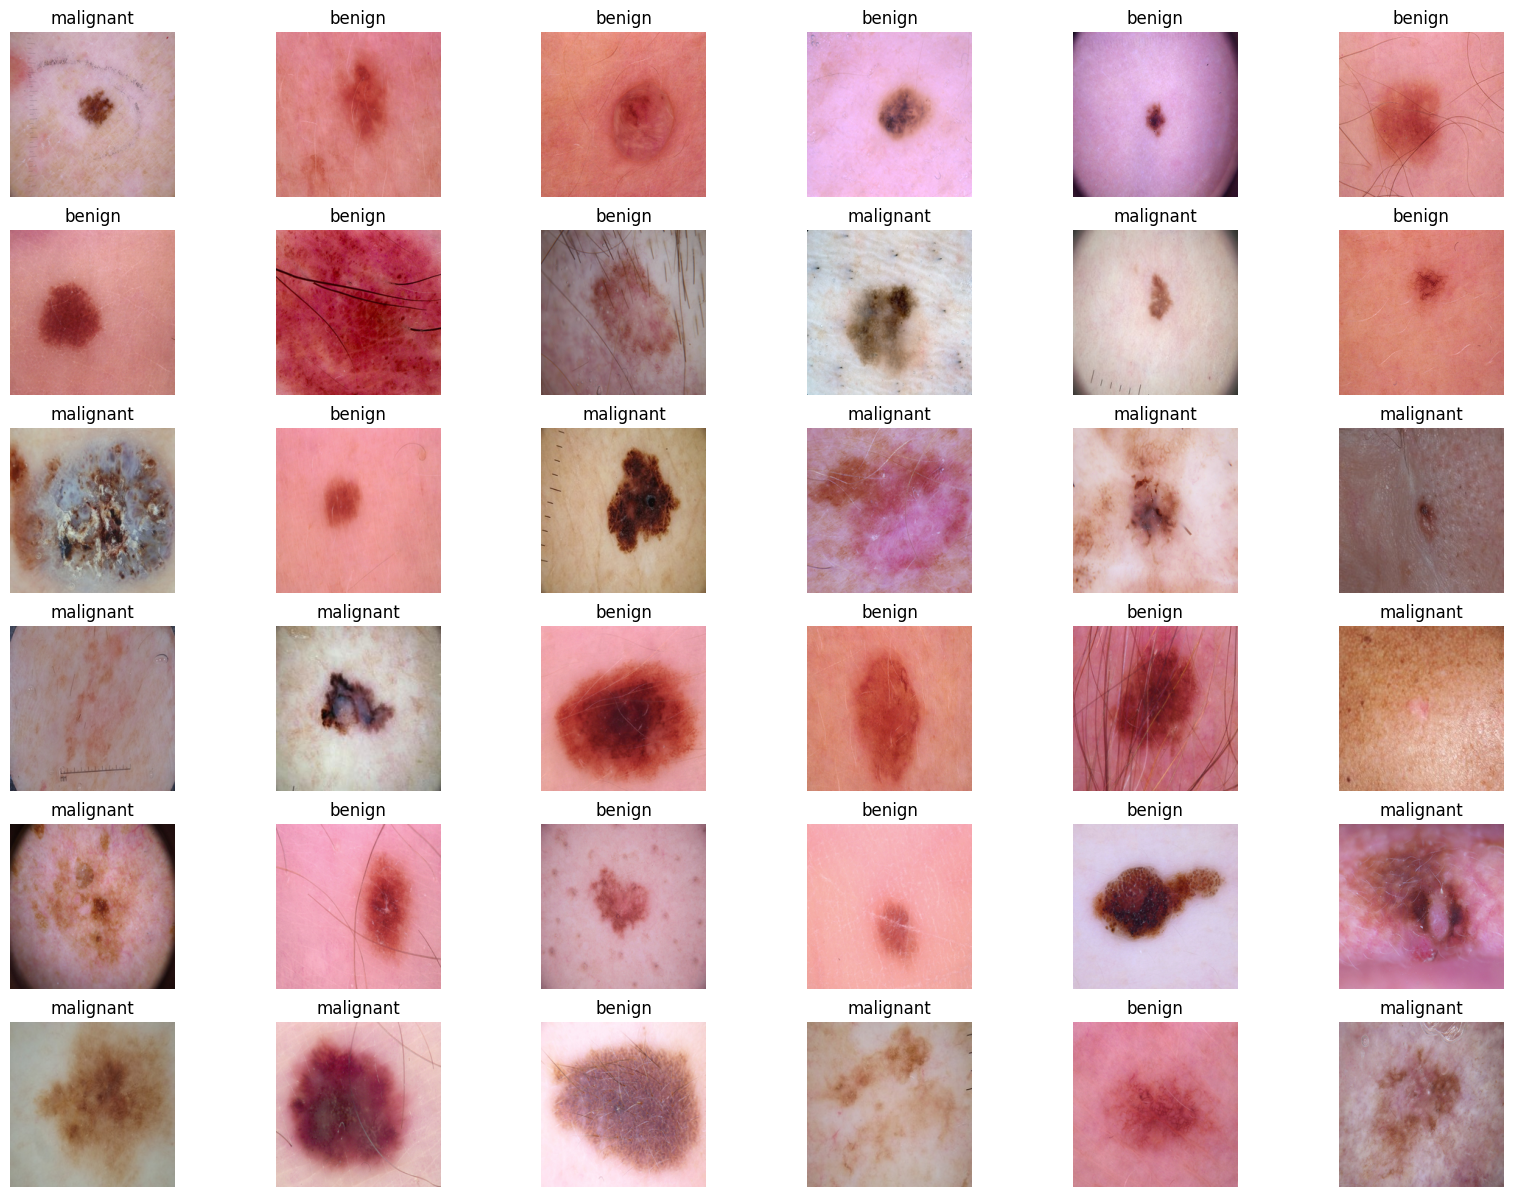

In [9]:
plt.figure(figsize=(20 , 15 ))
for n , i in enumerate(np.random.randint(0 , len(x_train) , 36)):
    plt.subplot( 6 , 6 , n + 1)
    img = cv2.cvtColor(x_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title(getcode(y_train[i]))
plt.show()

In [10]:
x_test = []
y_test = []

for folder in os.listdir(test_path):
    folder_path = test_path + '/' + folder 
    files = gb.glob( pathname= str(folder_path + '/*.jpg'))
    for file in files:
        image = cv2.imread(file)
        x_test.append(image)
        y_test.append(code[folder])

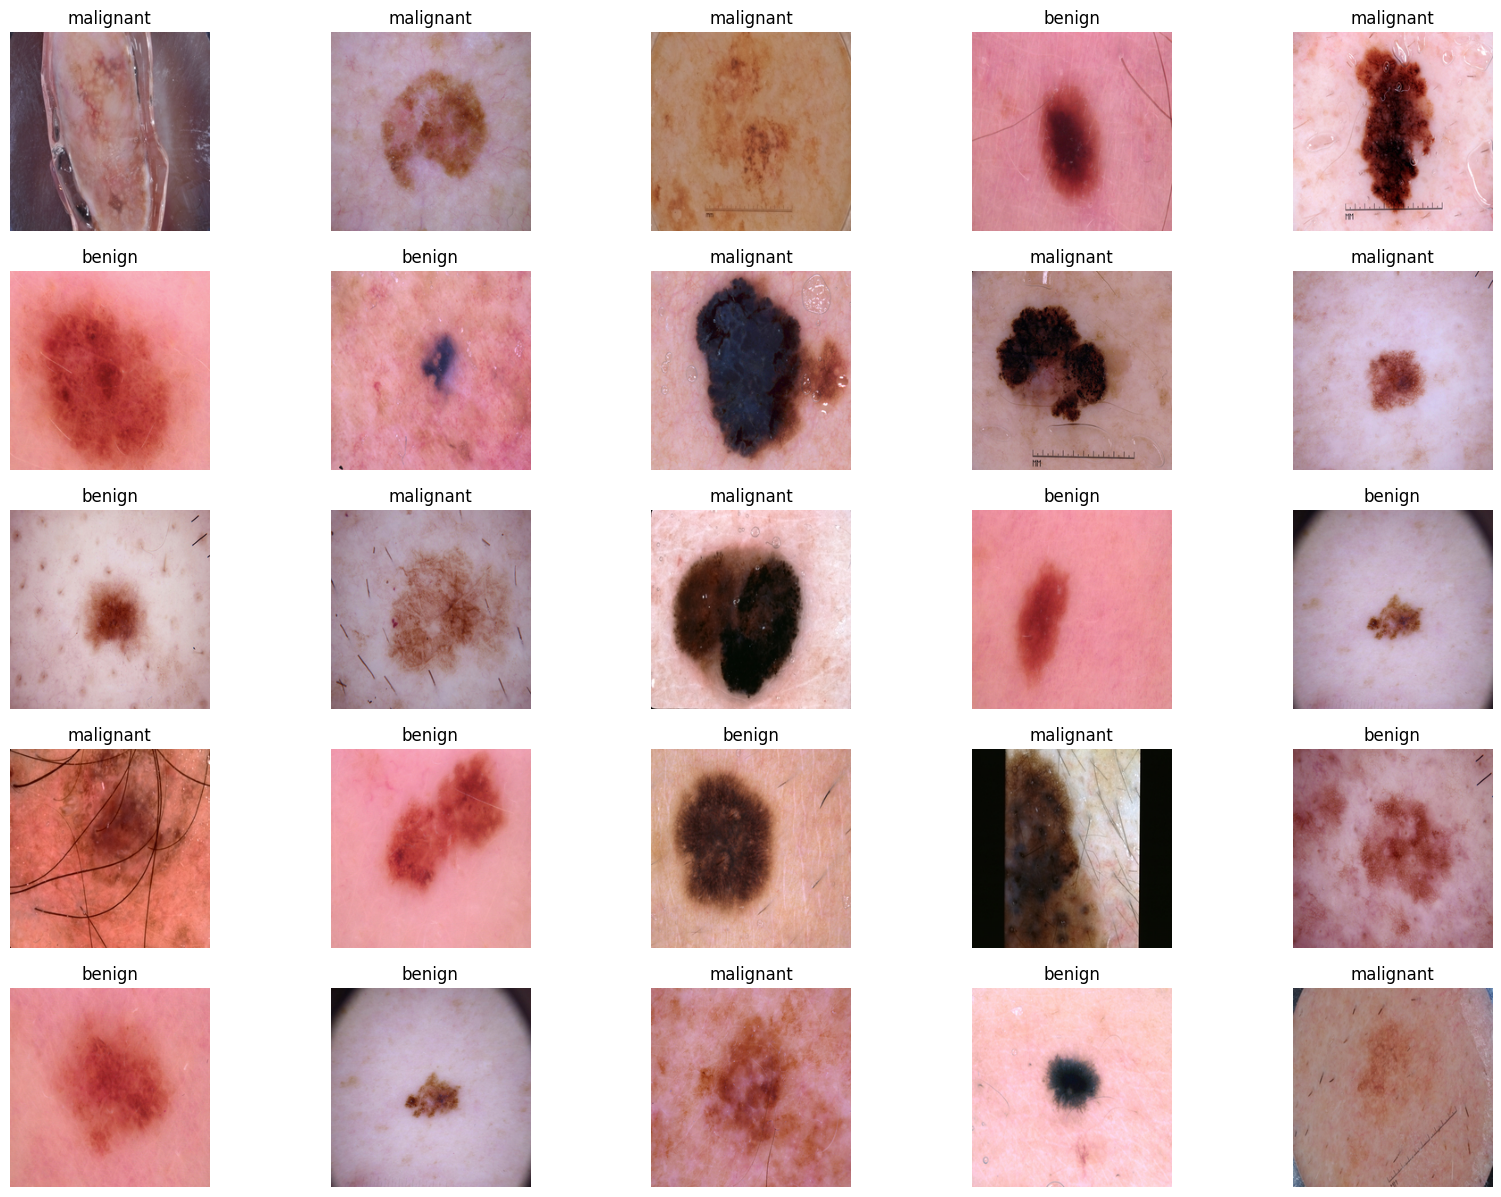

In [11]:
plt.figure(figsize=(20 , 15))
for n , i in enumerate(np.random.randint(0 , len(x_test) , 25)):
    plt.subplot( 5 , 5 , n + 1)
    img = cv2.cvtColor(x_test[i] , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.title(getcode(y_test[i]))
plt.show()

In [12]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
x_train.shape

(2637, 224, 224, 3)

In [14]:
keras_model = keras.models.Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2,2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(2,2),
    Dropout(0.25),

    Flatten(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\compu maarouf\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
keras_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 1,139,169 (4.35 MB)

 Trainable params: 1,137,377 (4.34 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [16]:
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [17]:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    verbose=1,
    factor=0.3,
    min_lr=1e-5
)


In [18]:
callbacks = [earlystop, learning_rate_reduction]

In [19]:
IMAGE_SIZE = (224, 224)     
BATCH_SIZE = 20
SEED = 42

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True,
    seed=SEED
)

val_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=False,
    seed=SEED
)



test_generator = test_datagen.flow_from_directory(
        directory=test_path,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='sparse',
        shuffle=False
    )

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [20]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0,1]),
    y=train_generator.classes
)

class_weight = {0: class_weights[0], 1: class_weights[1]}


In [21]:
history = keras_model.fit(
    train_generator,
    epochs=80,
    validation_data=val_generator,
    callbacks=callbacks,
    class_weight=class_weight

)

c:\Users\compu maarouf\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 71s 638ms/step - accuracy: 0.7531 - loss: 0.5937 - val_accuracy: 0.5465 - val_loss: 1.4449 - learning_rate: 0.0010
Epoch 2/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 67s 628ms/step - accuracy: 0.7744 - loss: 0.4933 - val_accuracy: 0.4706 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 3/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 66s 625ms/step - accuracy: 0.8057 - loss: 0.4275 - val_accuracy: 0.4782 - val_loss: 0.9763 - learning_rate: 0.0010
Epoch 4/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 69s 647ms/step - accuracy: 0.8137 - loss: 0.4216 - val_accuracy: 0.5351 - val_loss: 1.0781 - learning_rate: 0.0010
Epoch 5/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 640ms/step - accuracy: 0.8038 - loss: 0.4159 - val_accuracy: 0.7647 - val_loss: 0.4980 - learning_rate: 0.0010
Epoch 6/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 643ms/step - accuracy: 0.8242 - loss: 0.3878 - val_accuracy: 0.7685 - val_loss: 0.5647 - learning_rate: 0.0010
Epoch 7/80
106/106 ━━━━━━━━━━━━━━━━━━━━ 68s 643ms/step - accuracy: 0.8

In [22]:

val_loss, val_accuracy = keras_model.evaluate(val_generator)


print(f'val loss: {val_loss}')
print(f'val accuracy: {val_accuracy * 100} %')


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.8672 - loss: 0.3401
val loss: 0.3401246666908264
val accuracy: 86.71726584434509 %


In [23]:

test_loss, test_accuracy = keras_model.evaluate(test_generator)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy * 100} %')


33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.8803 - loss: 0.2717
Test loss: 0.2717396914958954
Test accuracy: 88.03030252456665 %


In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_paths = test_generator.filepaths
y_true = test_generator.classes

print(len(image_paths), len(y_true))  


660 660


In [37]:
y_pred = []

threshold = 0.4   

for path in image_paths:
    img = load_img(path, target_size=(224,224))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prob = keras_model.predict(img, verbose=0)[0][0]

    pred = 1 if prob >= threshold else 0
    y_pred.append(pred)

y_pred = np.array(y_pred)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(
    y_true,
    y_pred,
    target_names=list(test_generator.class_indices.keys())
))

cm = confusion_matrix(y_true, y_pred)
print(cm)


              precision    recall  f1-score   support

      benign       0.93      0.83      0.88       360
   malignant       0.82      0.93      0.87       300

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660

[[300  60]
 [ 22 278]]


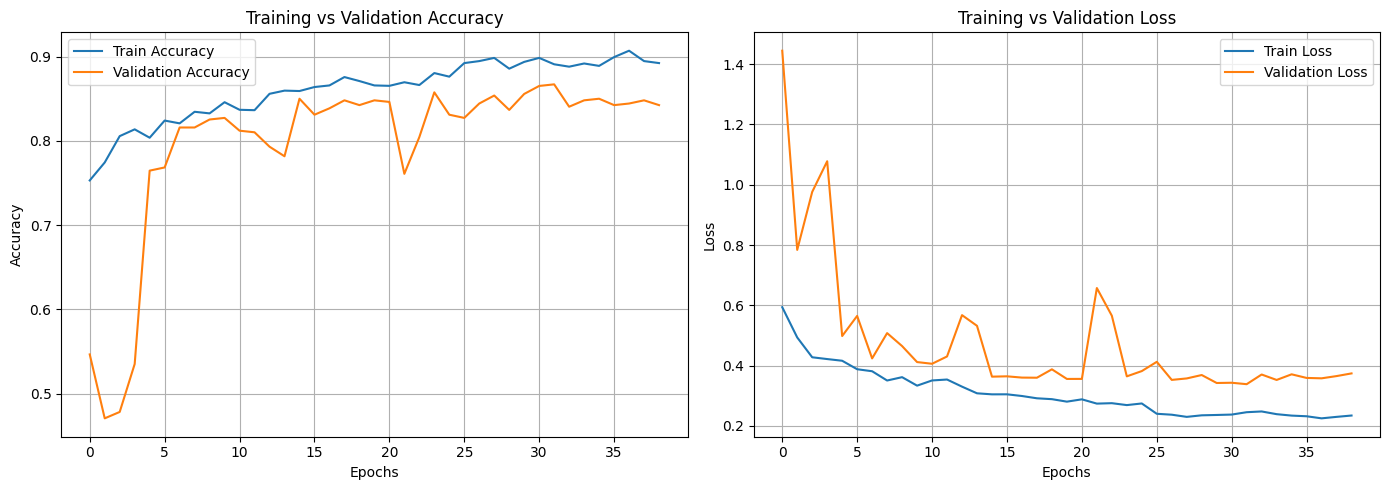

In [39]:
plt.figure(figsize=(14,5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
keras_model.save("model.h5")
